**Target:**

    -- In the previous step we had 9,907 parameters. In this step we want to
    improve this accuracy by using dropouts. We will use a dropout rate of 0.05 

**Results:**

    -- Parameters: 9,907
    -- Best Training Accuracy: 99.33
    -- Best Test Accuracy: 99.38


**Analysis:**

    -- The accuracy has improved a little (from 99.05 to 99.38) after introducing dropouts.
    -- In some epochs, we can see that the training accuracy is increasing but the test accuracy is going up and down a little (which means the model is not able to find minima). 

#**Import libraries**

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#**Data Transformations (without normalization)** 

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])


# **Dataset and Creating Train/Test Split (without normalization)**

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Dataloader Arguments & Test/Train Dataloaders (without normalization)**


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#**Getting data statistics (without normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)
torch.Size([128, 1, 28, 28])
torch.Size([128])


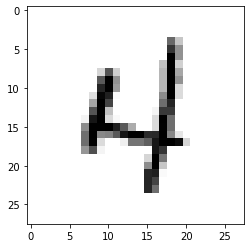

In [ ]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

#**Data Transformations (with normalization)**

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])


# **Dataset and Creating Train/Test Split (with normalization)**

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# **Dataloader Arguments & Test/Train Dataloaders (with normalization)**


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


#**Getting data statistics (with normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


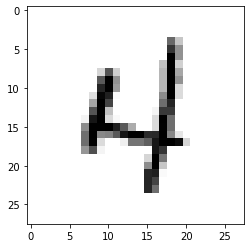

In [ ]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

**Model**

In [ ]:
dropout_value = 0.05
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #input block
    self.convblock1 = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 1, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  1+ (3-1)*1 = 3, C_out = 28
    
    #conv block 1
    self.convblock2 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 3, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  3+ (3-1)*1 = 5, , C_out = 28
    
    #conv block 2
    self.convblock3 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 5, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  5+ (3-1)*1 = 7, , C_out = 28
    
    #transition block1
    self.convblock4 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 7, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  7+ (3-1)*1 = 9, , C_out = 28

    self.pool1 = nn.MaxPool2d(2, 2) #R_in = 9, C_in = 28, K = 2, P = 0, S = 2, J_in = 1, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (2-1)*1 = 9, , C_out = 14

    #conv block 3
    self.convblock5 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 15, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(15),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 9, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (3-1)*2 = 13, , C_out = 14
    
    #conv block 4
    self.convblock6 = nn.Sequential(nn.Conv2d(in_channels = 15, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU(),
                                    nn.Dropout(dropout_value)) #R_in = 13, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  13+ (3-1)*2 = 17, , C_out = 14
    #gap layer 
    self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)) #R_in = 17, C_in = 14, K = 4, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  17+ (4-1)*2 = 23, , C_out = 14

    #output block
    self.convblock7 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 10, kernel_size = 3, padding = 0)) #R_in = 23, C_in = 14, K = 3, P = 0, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  23+ (3-1)*2 = 27, , C_out = 12

  def forward(self, x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.convblock3(x)
    x = self.convblock4(x)
    x = self.pool1(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.gap(x)
    x = self.convblock7(x)
    x = x.view(-1, 10)
    return F.log_softmax(x, dim=-1)

**Model parameters**

In [ ]:
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
summary(model, input_size = (1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
           Dropout-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,740
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]           1,744
      BatchNorm2d-10           [-1, 16, 28, 28]              32
             ReLU-11           [-1, 16, 28, 28]               0
          Dropout-12           [-1, 16, 28, 28]               0
    

**Training and Testing**

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=0.06417066603899002 Batch_id=468 Accuracy=91.41: 100%|██████████| 469/469 [00:18<00:00, 25.64it/s]



Test set: Average loss: 0.1061, Accuracy: 9714/10000 (97.14%)

EPOCH: 1


Loss=0.06448671966791153 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:19<00:00, 24.46it/s]



Test set: Average loss: 0.0690, Accuracy: 9788/10000 (97.88%)

EPOCH: 2


Loss=0.0622657872736454 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:15<00:00, 31.11it/s]



Test set: Average loss: 0.0490, Accuracy: 9869/10000 (98.69%)

EPOCH: 3


Loss=0.016787242144346237 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:14<00:00, 31.60it/s]



Test set: Average loss: 0.0374, Accuracy: 9888/10000 (98.88%)

EPOCH: 4


Loss=0.03194986283779144 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:14<00:00, 31.54it/s]



Test set: Average loss: 0.0398, Accuracy: 9883/10000 (98.83%)

EPOCH: 5


Loss=0.04366431012749672 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:14<00:00, 31.35it/s]



Test set: Average loss: 0.0307, Accuracy: 9906/10000 (99.06%)

EPOCH: 6


Loss=0.06651028245687485 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:15<00:00, 30.70it/s]



Test set: Average loss: 0.0262, Accuracy: 9919/10000 (99.19%)

EPOCH: 7


Loss=0.013992157764732838 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:14<00:00, 32.28it/s]



Test set: Average loss: 0.0225, Accuracy: 9929/10000 (99.29%)

EPOCH: 8


Loss=0.01384954247623682 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:16<00:00, 27.91it/s]



Test set: Average loss: 0.0247, Accuracy: 9928/10000 (99.28%)

EPOCH: 9


Loss=0.012861572206020355 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:14<00:00, 32.03it/s]



Test set: Average loss: 0.0229, Accuracy: 9931/10000 (99.31%)

EPOCH: 10


Loss=0.03873266279697418 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:14<00:00, 32.68it/s]



Test set: Average loss: 0.0248, Accuracy: 9920/10000 (99.20%)

EPOCH: 11


Loss=0.015142358839511871 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:14<00:00, 32.12it/s]



Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

EPOCH: 12


Loss=0.05676877126097679 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:14<00:00, 32.62it/s]



Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)

EPOCH: 13


Loss=0.022913610562682152 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:14<00:00, 32.28it/s]



Test set: Average loss: 0.0187, Accuracy: 9938/10000 (99.38%)

EPOCH: 14


Loss=0.03432294353842735 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:14<00:00, 31.79it/s]



Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

